In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
dataset_df = pd.read_csv('../../case data/hose-price-prediction/train.csv',index_col='Id',na_filter=True)
dataset = np.genfromtxt('../../case data/hose-price-prediction/train.csv',delimiter=',',skip_header=True)
dataset

array([[1.00000e+00, 6.00000e+01,         nan, ...,         nan,
                nan, 2.08500e+05],
       [2.00000e+00, 2.00000e+01,         nan, ...,         nan,
                nan, 1.81500e+05],
       [3.00000e+00, 6.00000e+01,         nan, ...,         nan,
                nan, 2.23500e+05],
       ...,
       [1.45800e+03, 7.00000e+01,         nan, ...,         nan,
                nan, 2.66500e+05],
       [1.45900e+03, 2.00000e+01,         nan, ...,         nan,
                nan, 1.42125e+05],
       [1.46000e+03, 2.00000e+01,         nan, ...,         nan,
                nan, 1.47500e+05]])

In [4]:
dataset_df.select_dtypes(include=np.number)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [5]:
dataset_df.select_dtypes(include=np.number).isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [3]:
subset = dataset_df[['LotArea','GrLivArea','SalePrice','OverallQual']]
subset.sort_values(by='LotArea')

,LotArea,GrLivArea,SalePrice,OverallQual
Id,,,,
957,1300,1229,124000,6
1040,1477,630,80000,4
615,1491,630,75500,4
490,1526,630,86000,4
1450,1533,630,92000,5
...,...,...,...,...
452,70761,1533,280000,7
707,115149,1824,302000,7
250,159000,2144,277000,6


In [4]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset[['LotArea','GrLivArea','OverallQual']],subset['SalePrice'],test_size=0.3,random_state=42)

In [5]:
train = pd.concat([train_x,train_y],axis=1)
train

,LotArea,GrLivArea,OverallQual,SalePrice
Id,,,,
136,10400,1682,7,174000
1453,3675,1072,5,145000
763,8640,1547,7,215200
933,11670,1905,9,320000
436,10667,1661,7,212000
...,...,...,...,...
1096,9317,1314,6,176432
1131,7804,1981,4,135000
1295,8172,864,5,115000


In [15]:
class RegressionTree:
    def __init__(self, x, y, data, interval, max_depth=0):
        self.x = x
        self.y = y
        self.data = data
        self.interval = interval
        self.depth = max_depth


class BestSplit(RegressionTree):
    def __init__(self, x, y, data, interval):
        super().__init__(x, y, data, interval)
        self.tree = list()

    def bin_split(self, i, feat):
        thresh = np.mean(self.data[feat].iloc[i:i + self.interval])
        lSet = self.data[self.data[feat] < thresh]
        rSet = self.data[self.data[feat] >= thresh]
        return lSet, rSet, thresh

    def calculate_RMSE(self, l, r):
        l_avg = np.mean(l[self.y])
        r_avg = np.mean(r[self.y])
        RMSE = np.sum(np.sqrt((l[self.y] - l_avg) ** 2)) + np.sum(
            np.sqrt((r[self.y] - r_avg) ** 2))
        return RMSE

    def best_split(self):
        for feat in self.x:
            for i in range(0, self.data.shape[0] - self.interval):
                left, right, thresh = self.bin_split(i, feat)
                rmse = self.calculate_RMSE(left, right)
                self.tree.append([feat, thresh, rmse])
        self.tree = pd.DataFrame(self.tree, columns=['feature', 'thresh', 'cost'])
        best_root = self.tree[self.tree['cost'] == np.min(self.tree['cost'])]

        if best_root.shape[0] > 1:
            best_root = best_root.sample(1)
        return best_root.feature.values[0], best_root.thresh.values[0], self.tree

In [20]:
feature,thresh,cost = BestSplit(x=['LotArea','GrLivArea','OverallQual'],y='SalePrice',data=train,interval=2).best_split()
feature,thresh

('OverallQual', 7.0)

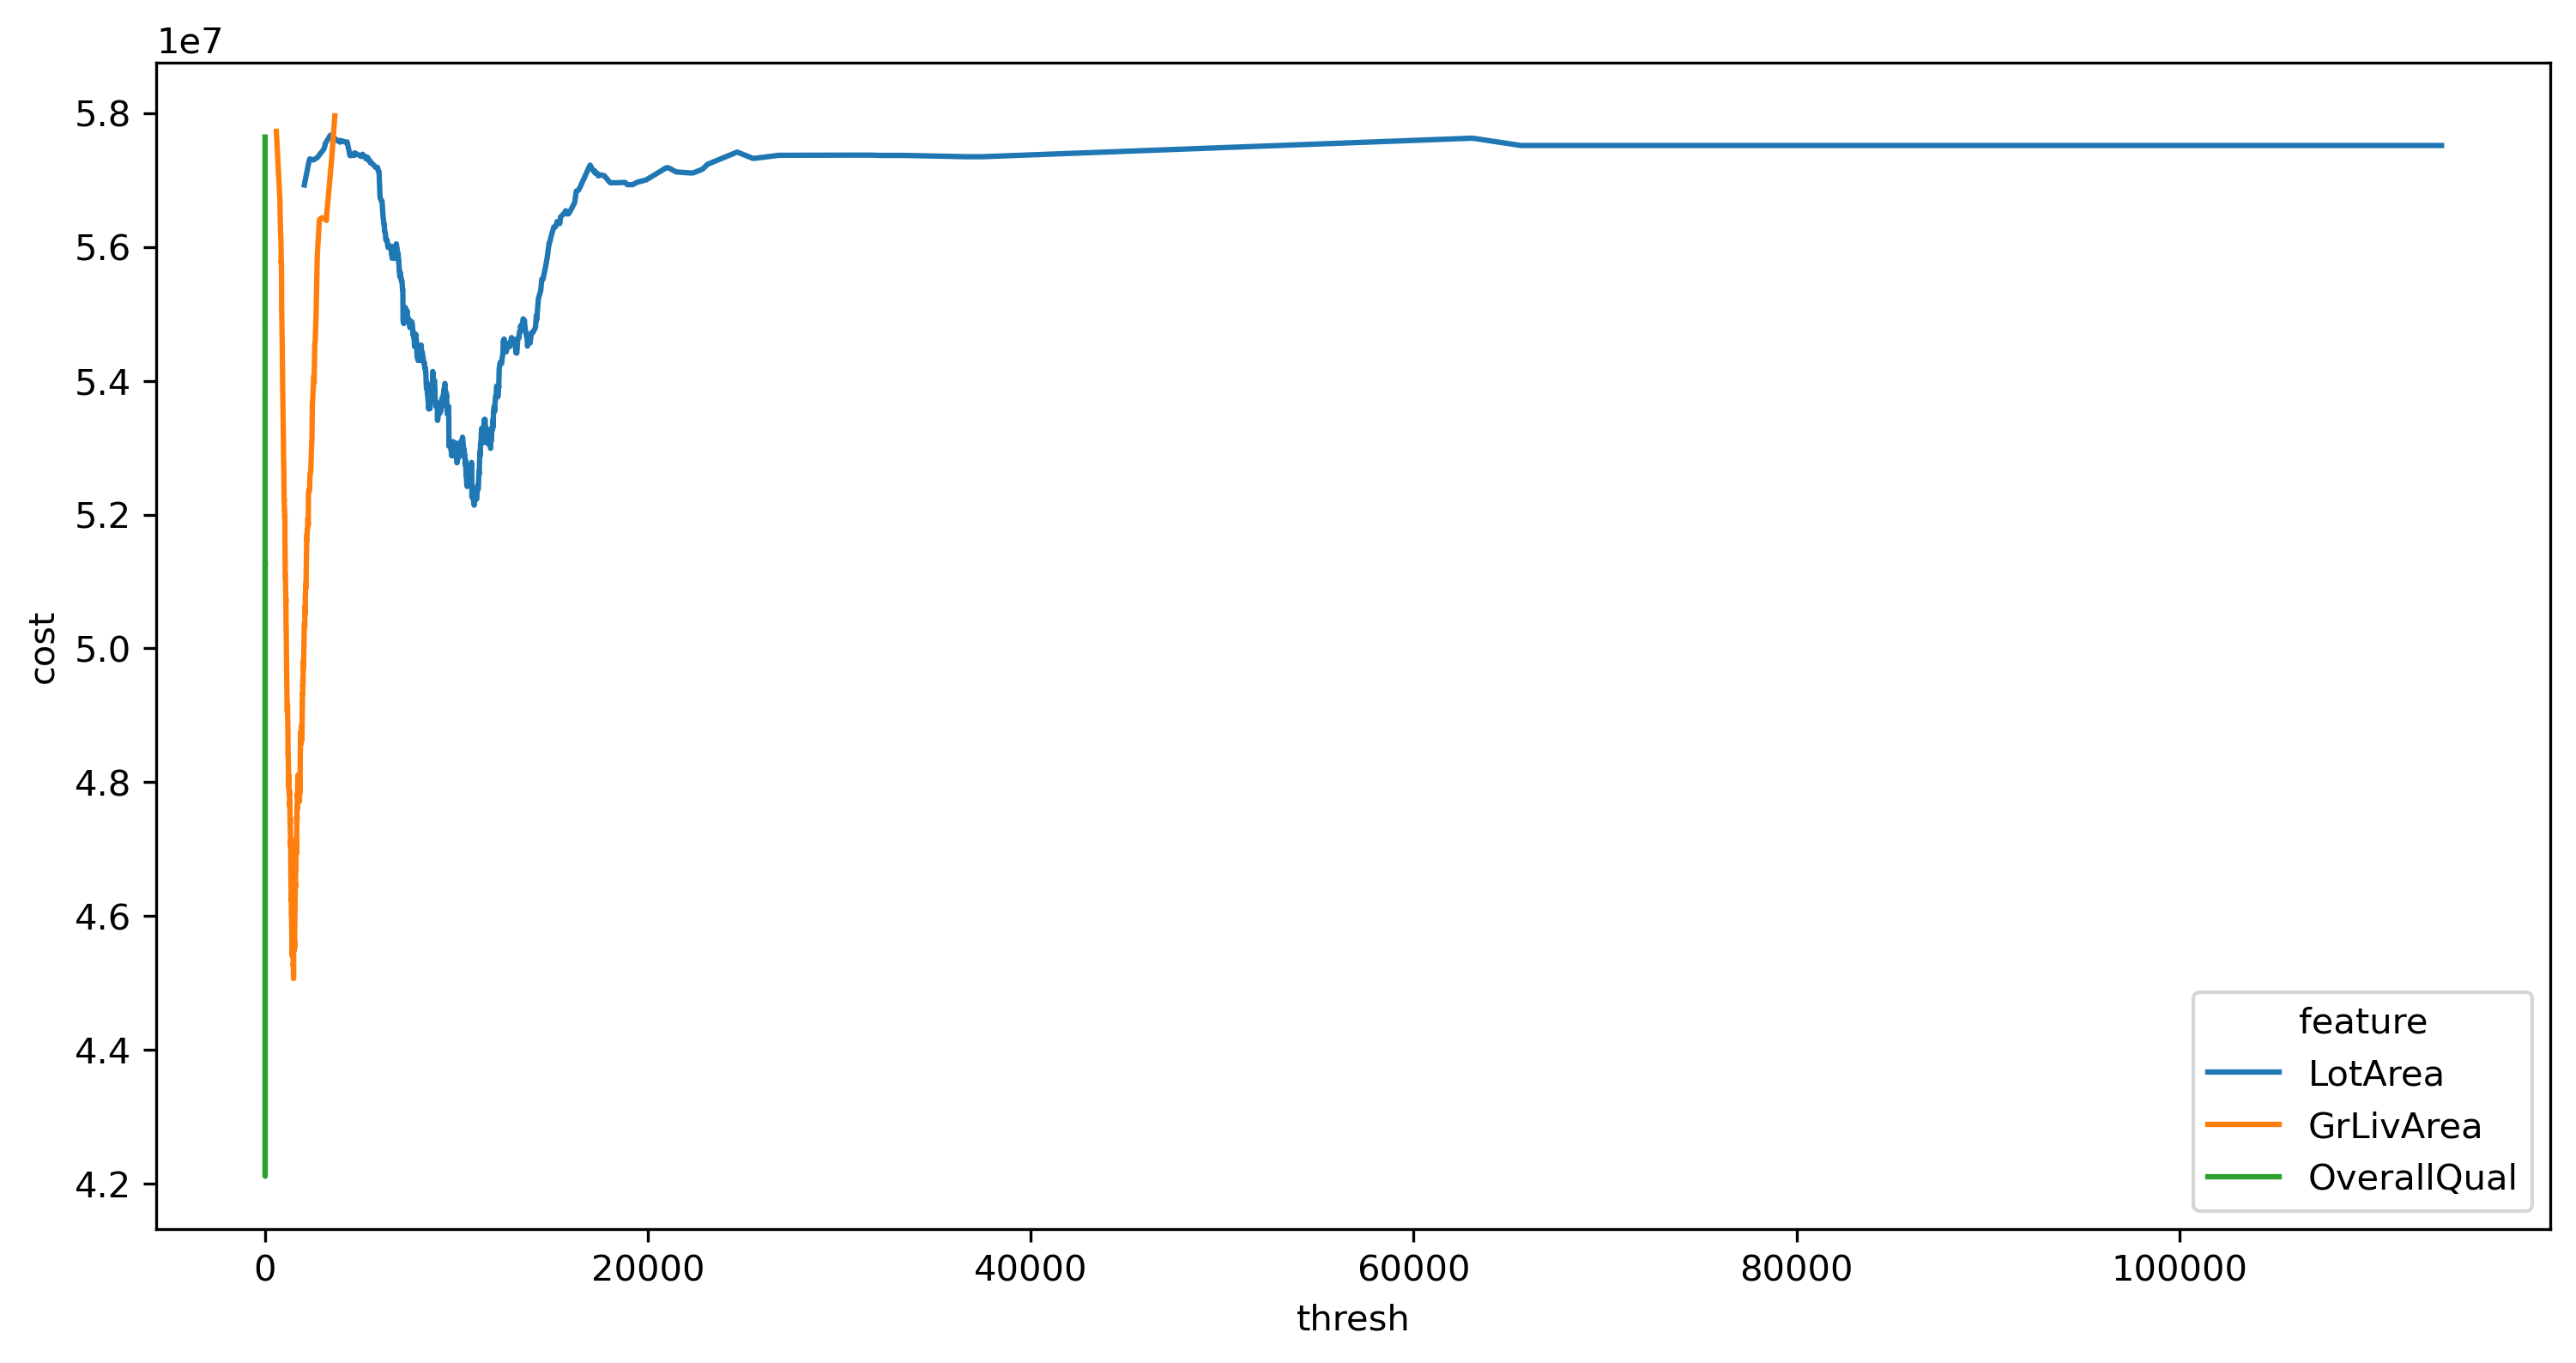

In [21]:
plt.figure(figsize=[12,6],dpi=300)
sns.lineplot(x='thresh',y='cost',data=cost,hue='feature')
plt.show()

In [150]:
import regression_model as reg
model = reg.TreeBuilder(train,'OverallQual','SalePrice',50,300)
tree = model.builder(data=train)

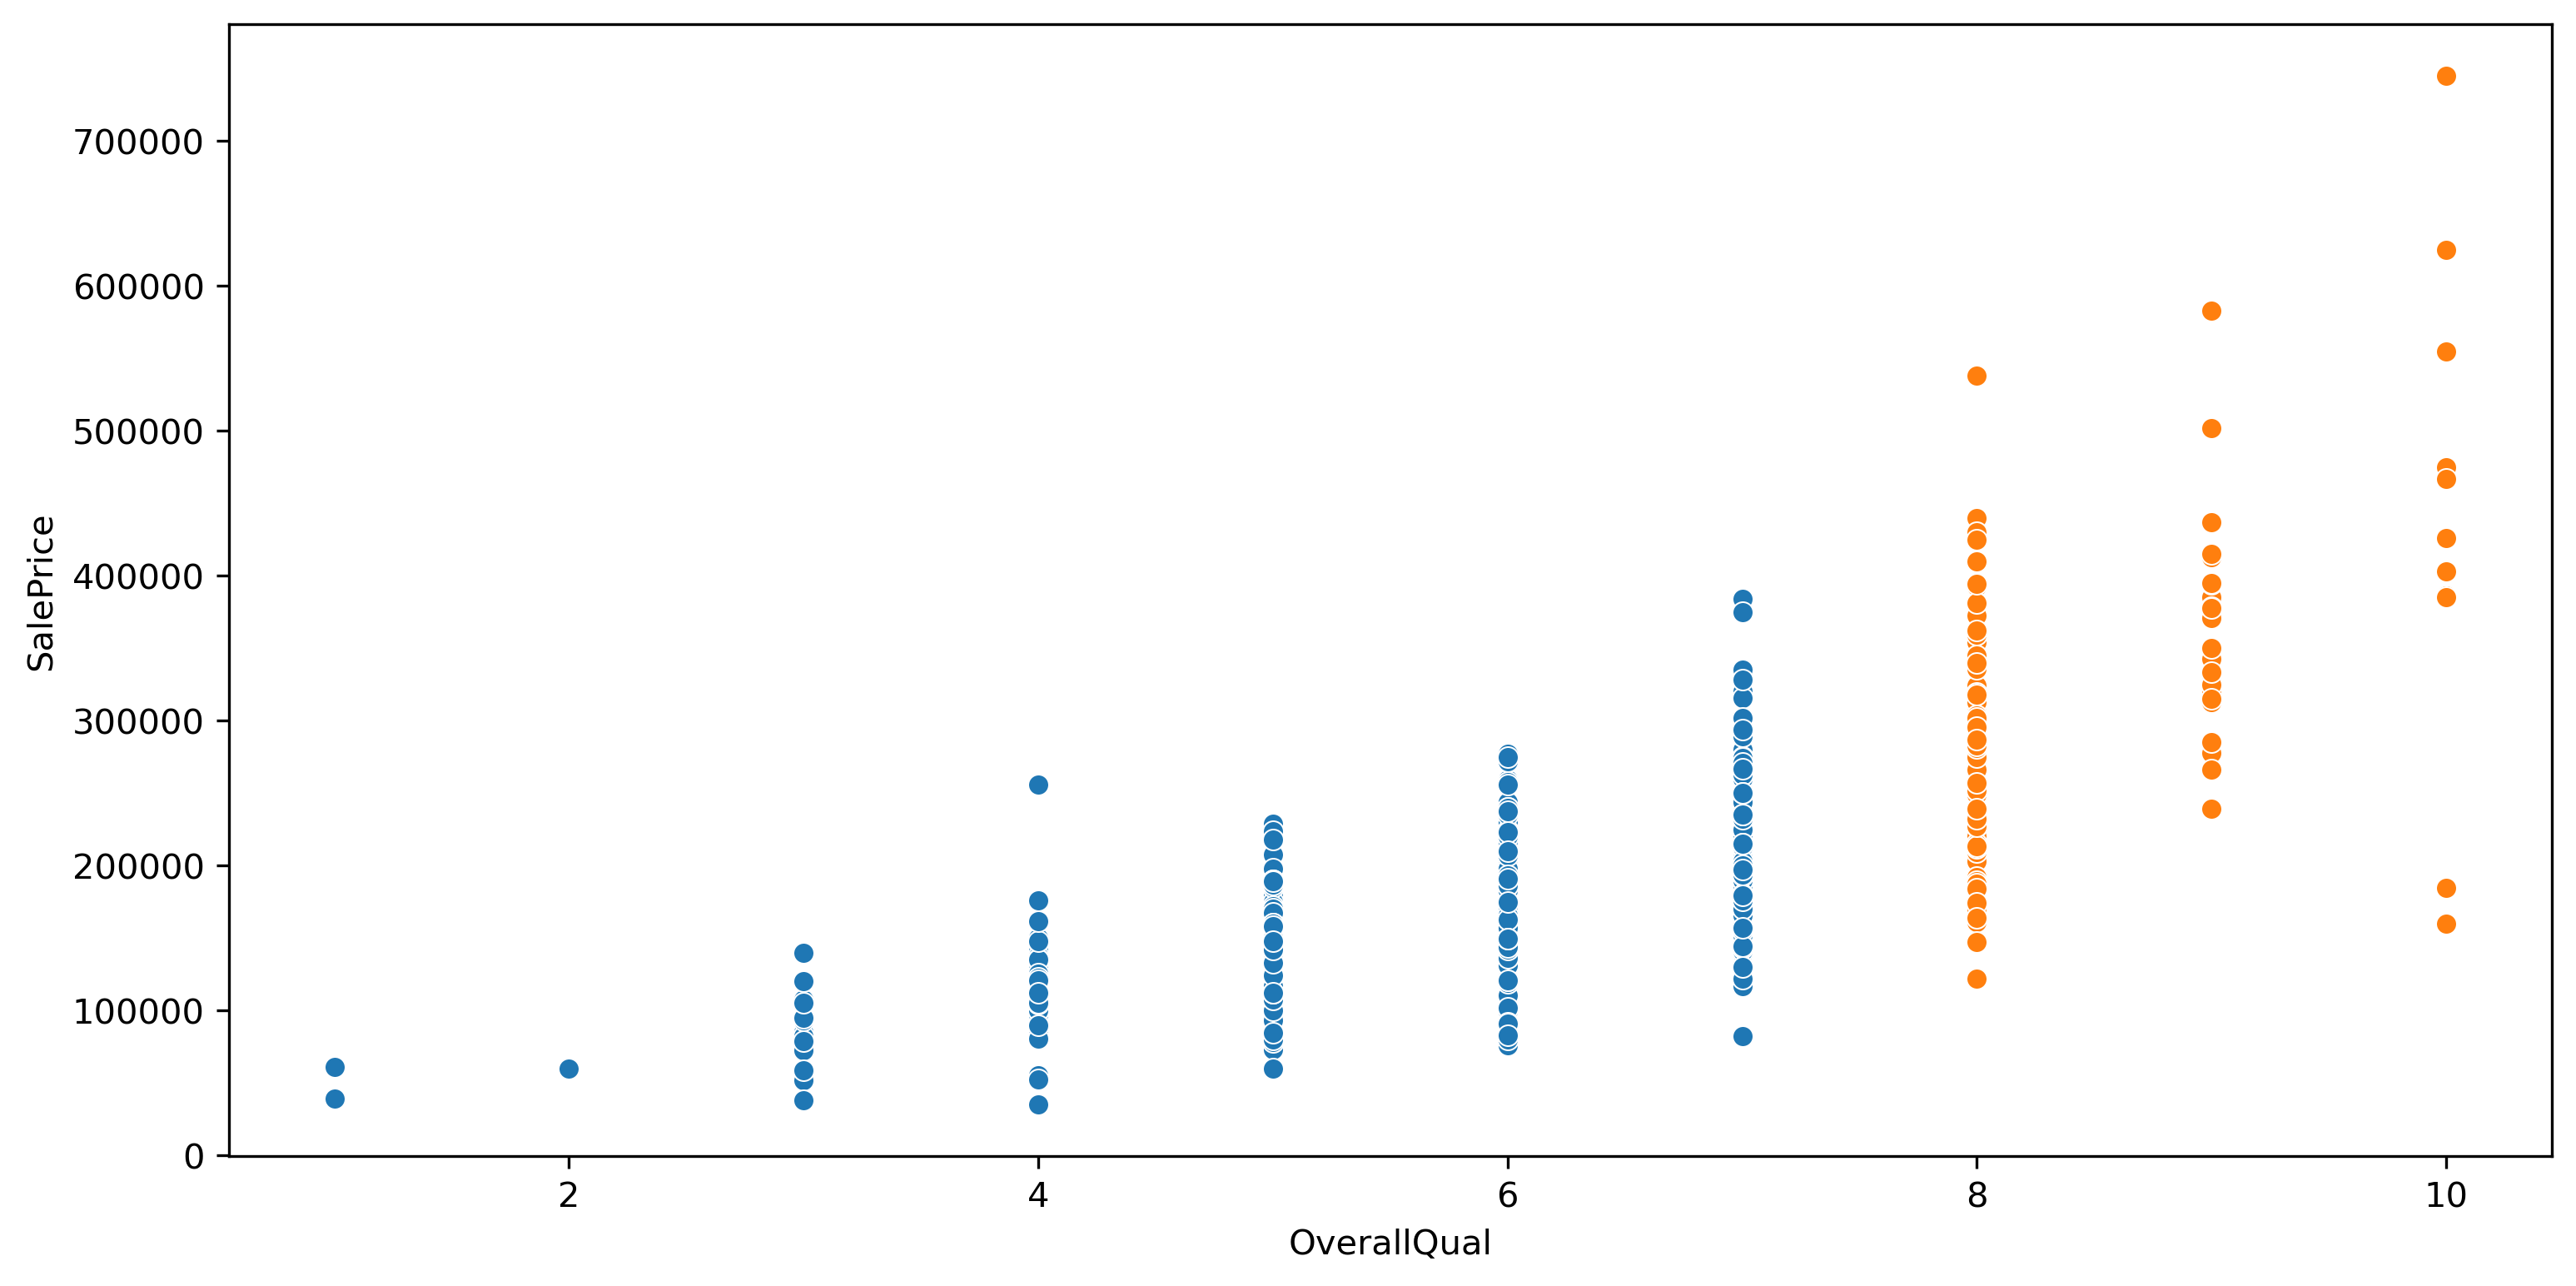

In [136]:
root = reg.RootNode(train,'OverallQual','SalePrice',4).best_split()[1]
left = train[train['OverallQual']<=root]['OverallQual']
right = train[train['OverallQual']>root]['OverallQual']

plt.figure(figsize=[12,6],dpi=300)
sns.scatterplot(x=left,y=train['SalePrice'])
sns.scatterplot(x=right,y=train['SalePrice'])
plt.show()

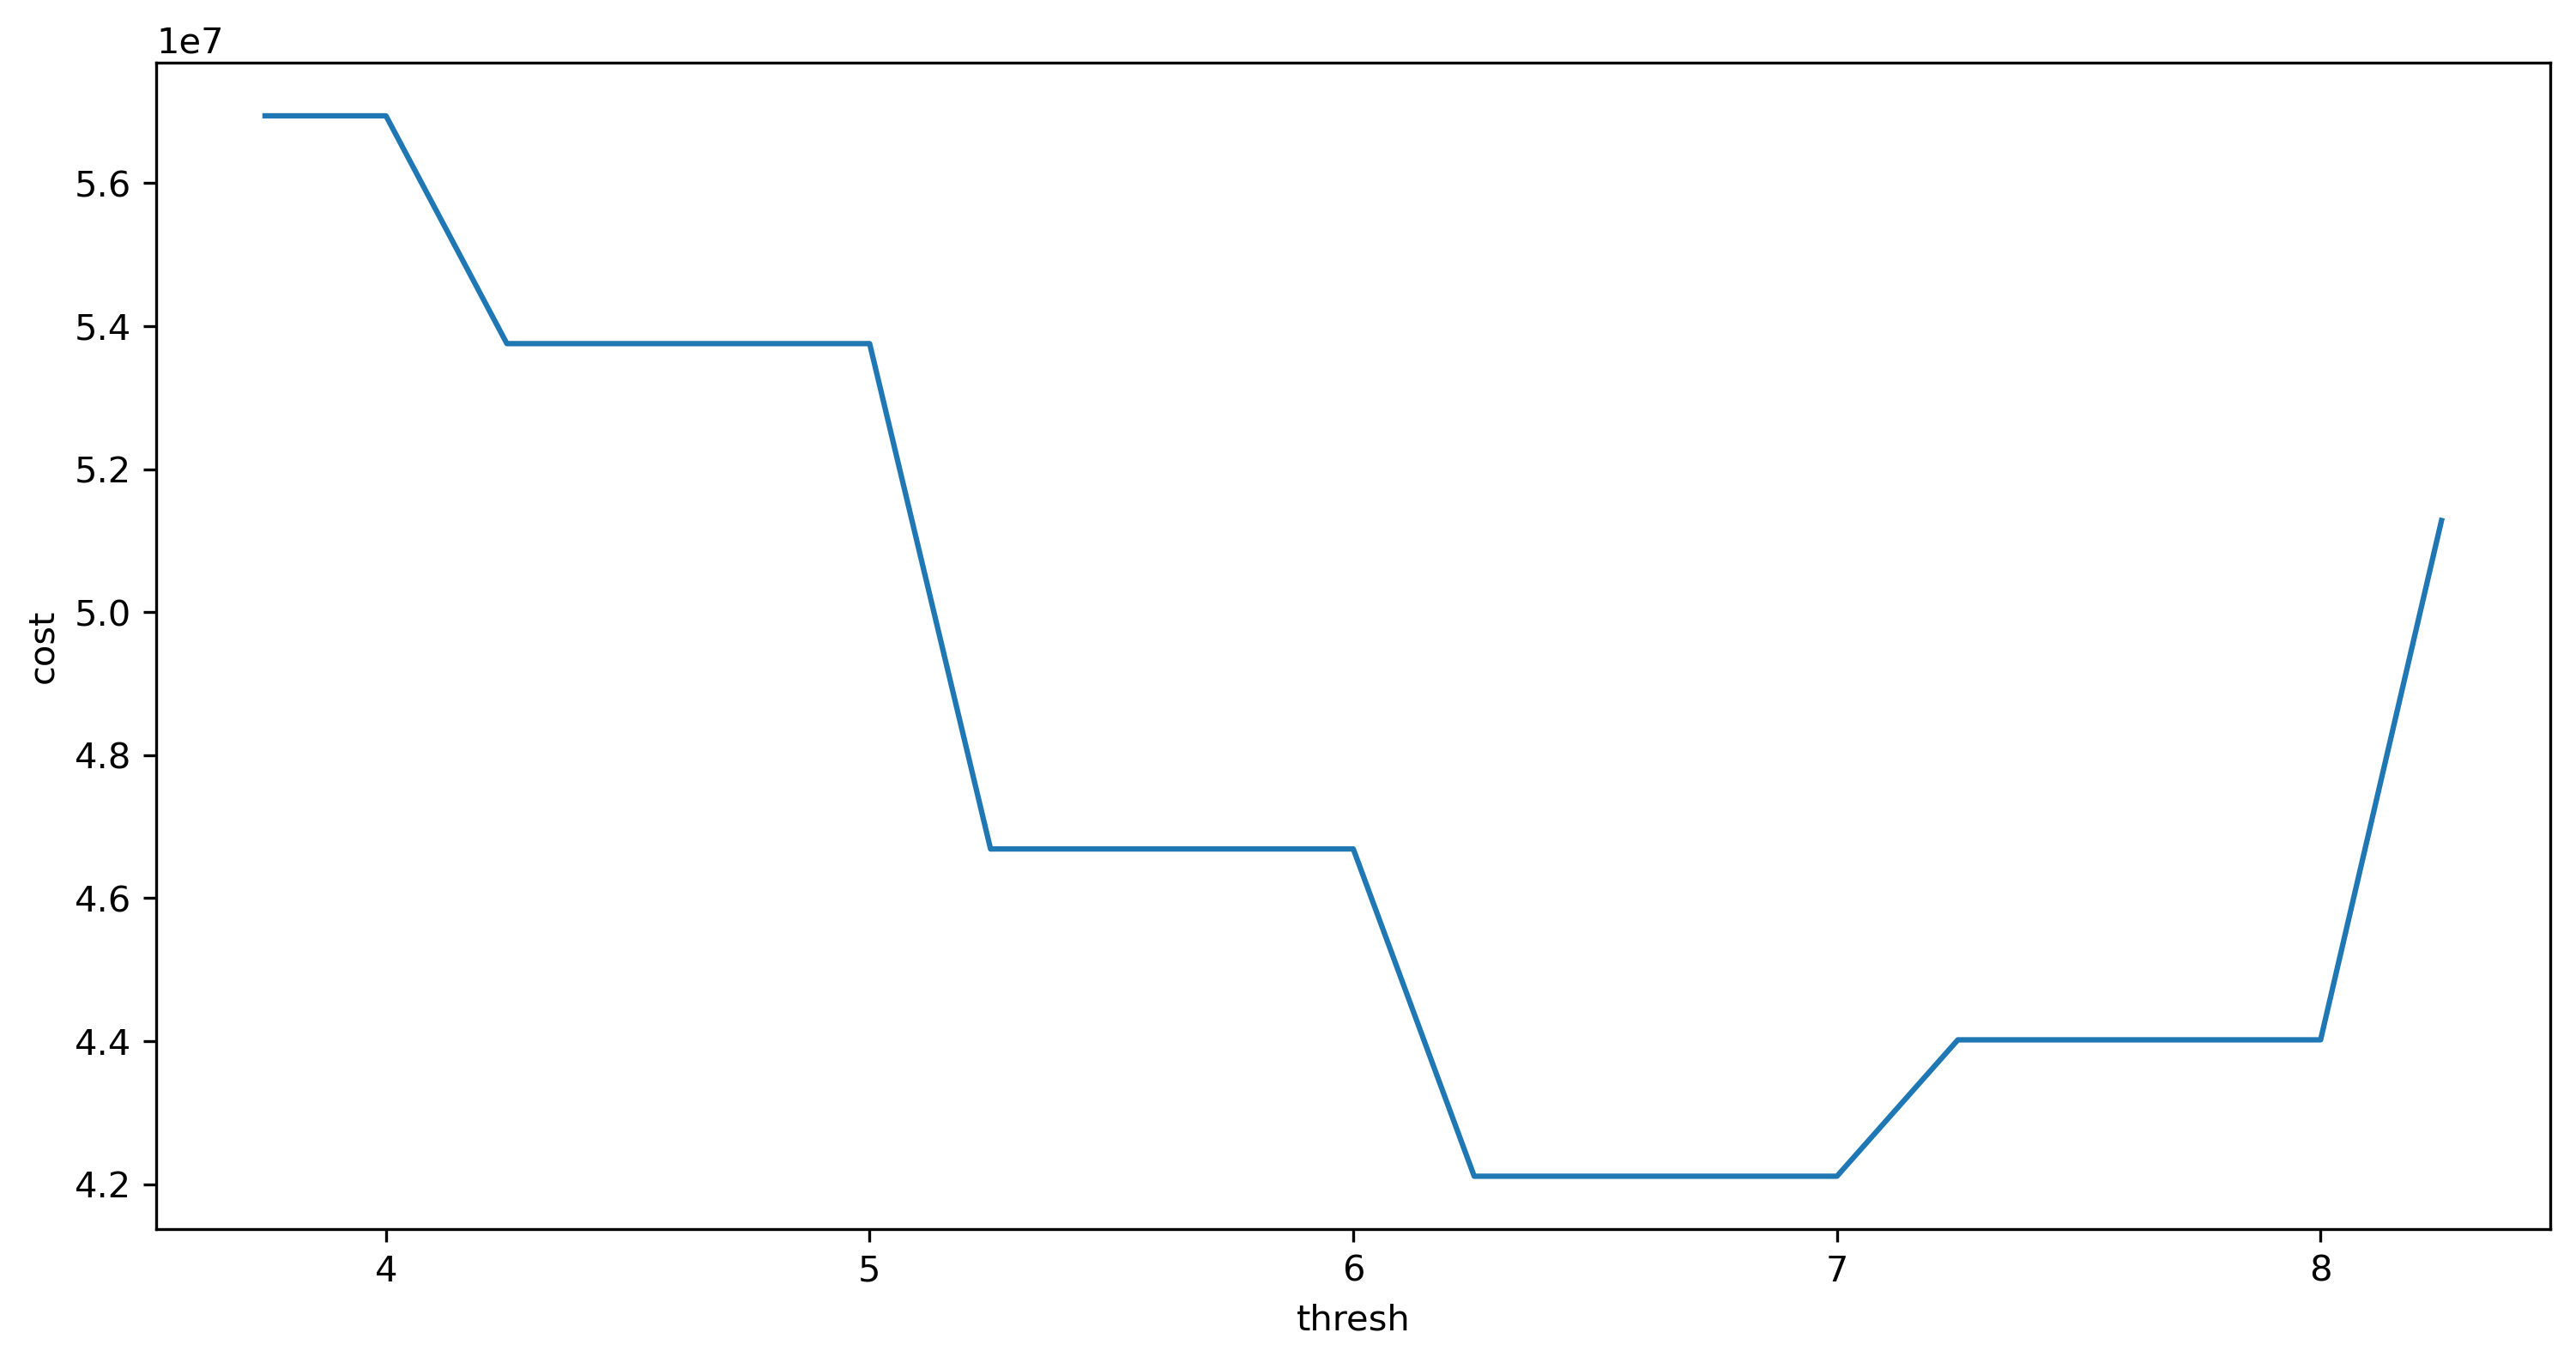

In [140]:
plt.figure(figsize=[12,6],dpi=300)
sns.lineplot(x='thresh',y='cost',data=reg.RootNode(train,'OverallQual','SalePrice',4).best_split()[0])
plt.show()

In [143]:
root = reg.RootNode(train,'OverallQual','SalePrice',4).best_split()[1]
left = train[train['OverallQual']<=root]
right = train[train['OverallQual']>root]
right[right['OverallQual']<=reg.RootNode(right,'OverallQual','SalePrice',4).best_split()[1]]['OverallQual']

Id
1279    8
1143    8
731     8
701     8
553     8
       ..
475     8
386     8
1438    8
770     8
1045    8
Name: OverallQual, Length: 122, dtype: int64

In [125]:
model_mf = reg.TreeBuilderMF(train,['LotArea','GrLivArea'],'SalePrice',2,12)
tree_mf = model_mf.builder(train)

In [147]:
import pprint
pprint.pprint(tree)

{'left': {'left': {'left': 103116.49484536082,
                   'node': 4.8,
                   'right': 133982.09961685824},
          'node': 5.18,
          'right': 162075.26199261993},
 'node': 6.2,
 'right': {'left': 206433.64782608696,
           'node': 7.64,
           'right': 300170.6073619632}}


In [41]:
import json

with open('./tree_mf.json','w') as out:
    json.dump(tree_mf,out)

In [152]:
pred_ = list()

def finder(data,d_tree):
    if data>d_tree['node']:
        if isinstance(d_tree['right'],dict):
            finder(data,d_tree['right'])
        else:
            pred_.append(d_tree['right'])
    else:
        if isinstance(d_tree['left'],dict):
            finder(data,d_tree['left'])
        else:
            pred_.append(d_tree['left'])

for point in test_x['OverallQual']:
    finder(point,tree)

In [127]:
pred_mf = list()
test_set = test_x.to_dict(orient='records')

def finder(data,d_tree):
    if data[d_tree['feature']]>d_tree['node']:
        if isinstance(d_tree['right'],dict):
            finder(data,d_tree['right'])
        else:
            pred_mf.append(d_tree['right'])
    else:
        if isinstance(d_tree['left'],dict):
            finder(data,d_tree['left'])
        else:
            pred_mf.append(d_tree['left'])

for point in test_set:
    finder(point,tree_mf)

In [153]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r2_score(test_y,pred_)*100,mean_squared_error(test_y,pred_),mean_absolute_error(test_y,pred_)

(62.24463002855909, 2634605116.3966703, 32599.39739129142)

In [128]:
r2_score(test_y,pred_mf)*100,mean_squared_error(test_y,pred_mf),mean_absolute_error(test_y,pred_mf)

(49.22130803430923, 3543384735.944456, 42042.045718134425)

In [154]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.asarray(train_x['OverallQual']).reshape(-1,1),train_y)
model.score(np.asarray(test_x['OverallQual']).reshape(-1,1),test_y)*100

64.41106738128511